In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from itertools import cycle
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from scikitplot.estimators import plot_learning_curve

from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay

# Import Data

In [2]:
df = pd.read_csv('df_bkg_red.csv').drop(columns = 'Unnamed: 0')
models = ['A', 'B', 'C', 'D']
for i in models:
    df = pd.concat([df, pd.read_csv('df_model%s_red.csv'%(i)).drop(columns = 'Unnamed: 0')], ignore_index=True) 

In [3]:
df

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,lead_ntrk,sub_ntrk,weights,labels
0,1143.592529,0.039967,146.150787,0.525687,0.505117,38,48,-27.057099,-23.003627,1.003236e+00,0
1,1476.433716,1.387635,14.246826,-1.370057,0.113648,21,33,-47.325838,-42.513492,1.136396e+00,0
2,1540.057007,1.520813,94.611481,1.142746,-0.478356,46,31,-22.852907,-45.262825,2.008979e+00,0
3,1533.117432,1.955224,79.998779,-0.021801,1.994529,46,37,-22.796860,-39.182772,6.744341e+00,0
4,1164.201416,0.747826,97.815399,-0.216873,0.608687,40,45,-25.285624,-26.312875,7.691056e+00,0
...,...,...,...,...,...,...,...,...,...,...,...
2067579,2686.224854,1.818661,211.678955,0.903337,-0.919513,58,129,-16.311280,44.333506,1.238581e-11,4
2067580,2692.715088,0.938040,136.215576,0.324722,-0.615071,78,78,3.673315,-6.691277,2.048238e-09,4
2067581,2476.301514,0.264742,106.248535,0.488685,0.740875,200,96,126.251694,12.251655,1.438433e-09,4
2067582,2140.740234,1.310556,192.544434,-0.370099,0.945993,134,99,61.481212,17.241032,3.750820e-10,4


In [4]:
df = df.sample(frac=1., random_state=42)
df

,mjjs,dyjjs,pt_asyms,lead_etas,sub_etas,lead_ungrs,sub_ungrs,lead_ntrk,sub_ntrk,weights,labels
185709,2348.204346,2.582690,107.597839,-1.781167,0.812853,30,34,-43.333058,-49.069295,4.186123e-01,0
28574,1509.027222,1.219730,20.730957,-0.629339,0.596446,40,30,-28.599571,-45.901697,2.753940e-01,0
1381864,1920.475098,0.934265,77.036987,-0.685208,0.254429,48,75,-23.425284,-5.055878,1.275407e-08,2
1052057,1286.780151,1.617033,95.428650,0.433493,-1.216733,49,61,-17.572048,-12.068677,2.699475e-07,1
17497,1183.809326,0.148550,43.906189,-0.690067,-0.527570,48,44,-17.499744,-27.603306,2.983498e+00,0
...,...,...,...,...,...,...,...,...,...,...,...
259178,1285.024292,0.913437,8.821899,-0.431818,0.493761,27,35,-39.554488,-38.044520,3.598126e-01,0
1414414,2131.005859,0.732007,1.118042,-0.334150,0.412292,102,90,29.524241,8.309284,2.203381e-08,2
131932,2054.116943,2.140792,145.848389,-1.060299,1.120960,65,38,-7.119301,-43.129277,3.084621e-01,0
671155,1248.218506,1.125891,124.323944,0.073235,1.242163,18,32,-48.180650,-40.531574,3.942528e-01,0


# Preprocessing

In [5]:
features = df.iloc[:, :7]
labels = df.labels

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Optimization

In [8]:
tree = DecisionTreeClassifier()
tree_params = {'criterion':['gini', 'entropy'], 
               'splitter':['best', 'random'], 
               'max_depth':[5, 10, 15, 20]}
clf = GridSearchCV(tree, tree_params, cv=3)
clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'splitter': ['best', 'random']})

In [9]:
best_params_depth = clf.best_params_
print(best_params_depth)

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}


In [10]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [11]:
y_preds = clf.predict(x_test)
precision = precision_score(y_test, y_preds, average='weighted')
recall = recall_score(y_test, y_preds, average = 'weighted')
f1 = f1_score(y_test, y_preds, average = 'weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.523
Recall: 0.585
F1: 0.523
Accuracy: 0.585


In [12]:
tree_bayes = {'min_samples_split':(0, 1), 
              'min_samples_leaf': (0, 0.5)}
def tree_func(min_samples_split, min_samples_leaf):
    tree = clf
    tree.fit(x_train, y_train)
    y_preds = tree.predict(x_test)
    score = accuracy_score(y_test, y_preds)
    return score

optimizer = BayesianOptimization(f = tree_func,
                                 pbounds = tree_bayes, verbose = 2,
                                 random_state = 42)
optimizer.maximize()
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   | min_sa... | min_sa... |
-------------------------------------------------
| 1         | 0.5846    | 0.1873    | 0.9507    |
| 2         | 0.5846    | 0.366     | 0.5987    |
| 3         | 0.5846    | 0.07801   | 0.156     |
| 4         | 0.5846    | 0.02904   | 0.8662    |
| 5         | 0.5846    | 0.3006    | 0.7081    |
| 6         | 0.5846    | 0.008474  | 0.7702    |
| 7         | 0.5846    | 0.4142    | 0.3003    |
| 8         | 0.5846    | 0.05068   | 0.5217    |
| 9         | 0.5846    | 0.002822  | 0.4638    |
| 10        | 0.5846    | 0.07732   | 0.4503    |
| 11        | 0.5846    | 0.01624   | 0.2152    |
| 12        | 0.5846    | 0.2209    | 0.8244    |
| 13        | 0.5846    | 0.00931   | 0.4383    |
| 14        | 0.5846    | 0.1976    | 0.4874    |
| 15        | 0.5846    | 0.3451    | 0.1224    |
| 16        | 0.5846    | 0.302     | 0.1517    |
| 17        | 0.5846    | 0.3964    | 0.8839    |
| 18        | 0.5846    | 0.2097    | 0.1654    |


In [13]:
tree = DecisionTreeClassifier(max_depth=10, 
                              min_samples_leaf=optimizer.max['params']['min_samples_leaf'], 
                              min_samples_split=optimizer.max['params']['min_samples_split'], 
                              criterion='entropy', 
                              splitter='best')
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       min_samples_leaf=0.07800932022121826,
                       min_samples_split=0.15599452033620265)

In [14]:
pkl.dump(tree, open('dt_optimized_red_noungr.pkl','wb'))

In [15]:
ada_grid = {'n_estimators':[20, 50, 80],#} 
            'algorithm':['SAMME', 'SAMME.R']}
ada_bayes = {'learning_rate':[1e-7, 1.0]}

In [16]:
clf = GridSearchCV(AdaBoostClassifier(tree), ada_grid, cv = 3, verbose = 2)
clf.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...................algorithm=SAMME, n_estimators=20; total time= 2.7min
[CV] END ...................algorithm=SAMME, n_estimators=20; total time= 2.7min
[CV] END ...................algorithm=SAMME, n_estimators=20; total time= 2.7min
[CV] END ...................algorithm=SAMME, n_estimators=50; total time= 7.1min
[CV] END ...................algorithm=SAMME, n_estimators=50; total time= 6.8min
[CV] END ...................algorithm=SAMME, n_estimators=50; total time= 6.4min
[CV] END ...................algorithm=SAMME, n_estimators=80; total time= 9.8min
[CV] END ...................algorithm=SAMME, n_estimators=80; total time= 9.8min
[CV] END ...................algorithm=SAMME, n_estimators=80; total time= 9.6min
[CV] END .................algorithm=SAMME.R, n_estimators=20; total time= 2.8min
[CV] END .................algorithm=SAMME.R, n_estimators=20; total time= 2.5min
[CV] END .................algorithm=SAMME.R, n_es

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                           max_depth=10,
                                                                           min_samples_leaf=0.07800932022121826,
                                                                           min_samples_split=0.15599452033620265)),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [20, 50, 80]},
             verbose=2)

In [17]:
pkl.dump(clf, open('bdt_non_bayes_red_noungr.pkl', 'wb'))

In [19]:
clf = pkl.load(open('bdt_non_bayes_red.pkl', 'rb'))
tree = pkl.load(open('dt_optimized_red.pkl', 'rb'))

In [ ]:
best_params = clf.best_params_
def ada_func(learning_rate):
    model = AdaBoostClassifier(tree, 
                               n_estimators = best_params['n_estimators'], 
                               algorithm = best_params['algorithm'], 
                               learning_rate = learning_rate)
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    score = accuracy_score(y_test, y_preds)
    return score

optimizer = BayesianOptimization(f = ada_func,
                                 pbounds = ada_bayes, verbose = 2,
                                 random_state = 42)
optimizer.maximize()
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   | learni... |
-------------------------------------
| 1         | 0.5806    | 0.3745    |
| 2         | 0.5818    | 0.9507    |
| 3         | 0.5816    | 0.732     |
| 4         | 0.5814    | 0.5987    |
| 5         | 0.5797    | 0.156     |
| 6         | 0.5812    | 1.0       |
| 7         | 0.5815    | 0.9558    |
| 8         | 0.5818    | 0.9507    |
| 9         | 0.5813    | 0.9279    |
| 10        | 0.5815    | 0.7065    |
| 11        | 0.5818    | 0.7585    |
| 12        | 0.5815    | 0.7816    |
| 13        | 0.5815    | 0.672     |
| 14        | 0.5815    | 0.6402    |
| 15        | 0.5817    | 0.8236    |
| 16        | 0.5811    | 0.8478    |
| 17        | 0.5812    | 0.8052    |
| 18        | 0.5814    | 0.5579    |
| 19        | 0.5808    | 0.5111    |
| 20        | 0.548     | 1.587e-05 |
| 21        | 0.5806    | 0.2581    |
| 22        | 0.5807    | 0.4382    |
| 23        | 0.5799    | 0.2055    |
| 24        | 0.5804    | 0.3159    |
| 25        

In [ ]:
bdt = AdaBoostClassifier(tree, 
                         learning_rate=optimizer.max["params"]['learning_rate'], 
                         n_estimators = best_params['n_estimators'], 
                         algorithm = best_params['algorithm'])
bdt.fit(x_train, y_train)
pkl.dump(bdt, open('bdt_optimized_red_noungr.pkl', 'wb'))

In [8]:
bdt = pkl.load(open('bdt_optimized_red_noungr.pkl', 'rb'))

In [23]:
y_preds = bdt.predict(x_train)
precision = precision_score(y_train, y_preds, average='weighted')
recall = recall_score(y_train, y_preds, average = 'weighted')
f1 = f1_score(y_train, y_preds, average = 'weighted')
accuracy = accuracy_score(y_train, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.642
Recall: 0.669
F1: 0.651
Accuracy: 0.669


In [ ]:
y_preds = bdt.predict(x_test)
precision = precision_score(y_test, y_preds, average='weighted')
recall = recall_score(y_test, y_preds, average = 'weighted')
f1 = f1_score(y_test, y_preds, average = 'weighted')
accuracy = accuracy_score(y_test, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plot_learning_curve(bdt, X = x_train, y = y_train, ax=ax)

In [ ]:
cm = confusion_matrix(y_test.values, y_preds, normalize='true')
tick_labs = ['Background', 'Model A', 'Model B', 'Model C', 'Model D']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize = (10, 7))
cm_display.plot(ax=ax)
plt.show()

In [27]:
bdt.score(x_test, y_test)

0.6694863814546923

In [ ]:
dat = dict()
for i in range(len(df.columns[:-2])):
    dat[df.columns[i]] = str(round(bdt.feature_importances_[i], 3)*100)+'%'

In [ ]:
dat

# Binary

In [13]:
df_bin = df.copy()
df_bin.labels = df.labels.replace([2, 3, 4], 1)

In [14]:
features = df_bin.iloc[:, :-2]
labels = df_bin.labels

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [35]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=15,
                            min_samples_leaf=0.36931642349065275,
                           min_samples_split=0.7479086208293507)
bdt = AdaBoostClassifier(tree, 
                         learning_rate=optimizer.max["params"]['learning_rate'], 
                         n_estimators=best_params['n_estimators'])

In [36]:
bdt.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=15,
                                                         min_samples_leaf=0.36931642349065275,
                                                         min_samples_split=0.7479086208293507),
                   learning_rate=0.9912684934237729, n_estimators=80)

In [37]:
pkl.dump(bdt, open('bdt_bin_optimized_red.pkl', 'wb'))

In [38]:
y_preds = bdt.predict(x_test)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
accuracy = accuracy_score(y_test, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.883
Recall: 0.869
F1: 0.876
Accuracy: 0.877


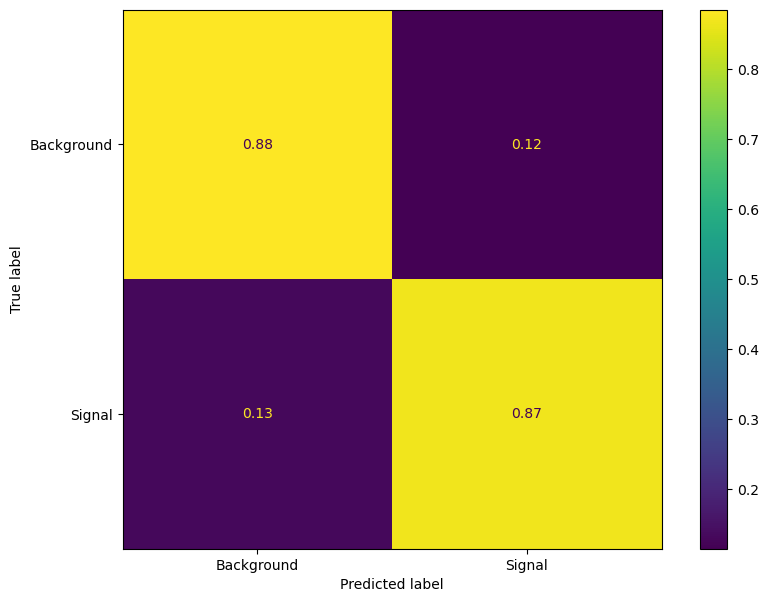

In [39]:
cm = confusion_matrix(y_test.values, y_preds, normalize='true')
tick_labs = ['Background', 'Signal']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tick_labs)
fig, ax = plt.subplots(figsize = (10, 7))
cm_display.plot(ax=ax)
plt.show()

In [40]:
y_preds = bdt.predict(x_train)
precision = precision_score(y_train, y_preds)
recall = recall_score(y_train, y_preds)
f1 = f1_score(y_train, y_preds)
accuracy = accuracy_score(y_train, y_preds)
print('Precision: %.3f\nRecall: %.3f\nF1: %.3f\nAccuracy: %.3f'%(precision, recall, f1, accuracy))

Precision: 0.882
Recall: 0.869
F1: 0.876
Accuracy: 0.877


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

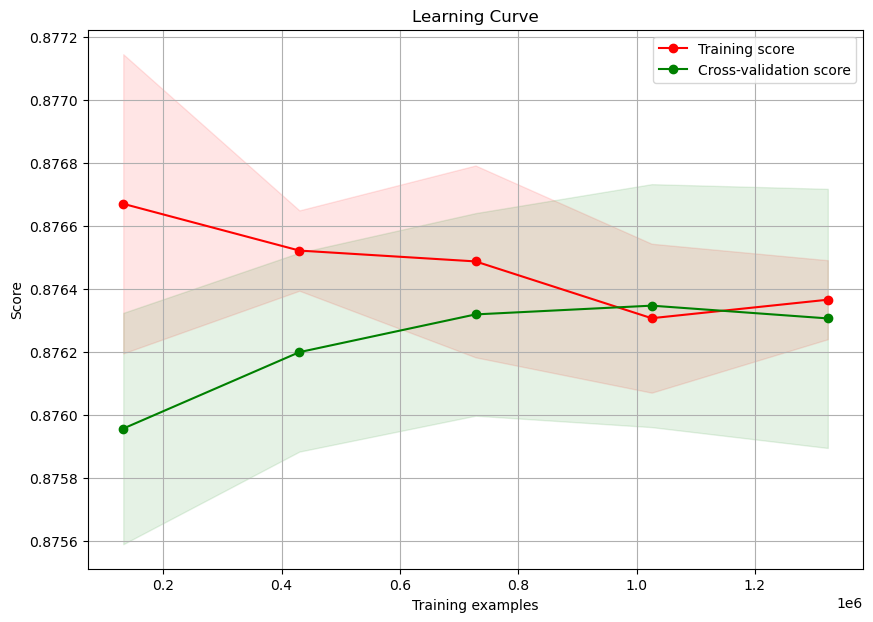

In [41]:
fig, ax = plt.subplots(figsize=(10, 7))
plot_learning_curve(bdt, X = x_train, y = y_train, ax=ax)

# New Stuff

In [2]:
from sklearn.preprocessing import MinMaxScaler, label_binarize 
from sklearn.metrics import roc_curve, auc

In [3]:
nbc = pkl.load(open('bdt_optimized_red.pkl', 'rb'))
nbc_bin = pkl.load(open('bdt_bin_optimized_red.pkl', 'rb'))

C:\Users\ojjy1\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ojjy1\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
df = pd.read_csv('df_bkg_red.csv').drop(columns = 'Unnamed: 0')
models = ['A', 'B', 'C', 'D']
for i in models:
    df = pd.concat([df, pd.read_csv('df_model%s_red.csv'%(i)).drop(columns = 'Unnamed: 0')], ignore_index=True) 

In [5]:
df_bin = df.copy()
df_bin.labels = df.labels.replace([2, 3, 4], 1)

In [6]:
labels_bin = df_bin.labels

In [7]:
features = df.iloc[:, :7]
labels = df.labels

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(features, labels_bin, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train_bin = scaler.fit_transform(x_train_bin)
x_test_bin = scaler.fit_transform(x_test_bin)

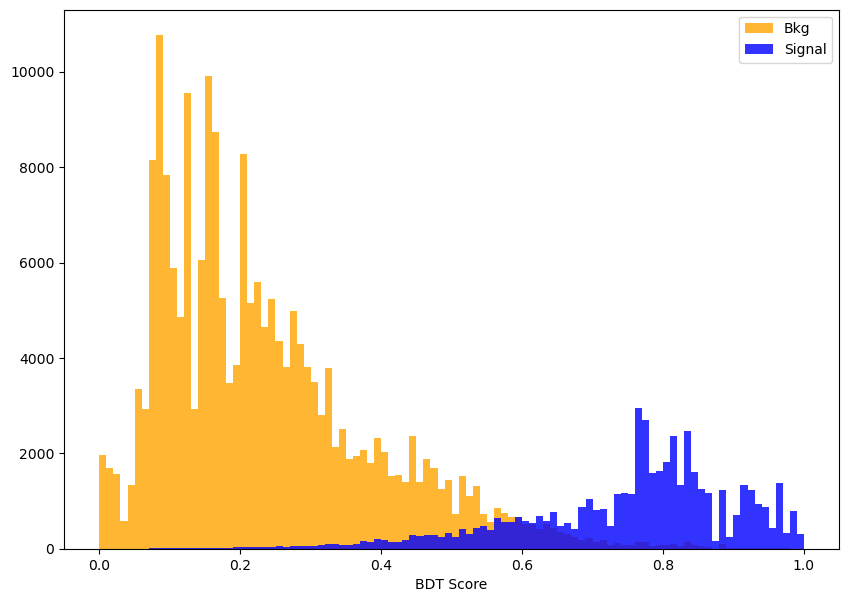

In [26]:
probs = nbc_bin.predict_proba(x_test)

scaled = MinMaxScaler().fit_transform(probs)[:, 1]
plt.figure(figsize=(10,7))
plt.hist(x=scaled[y_test==0], color='orange', label = 'Bkg', bins=100, alpha=0.8)
plt.hist(x=scaled[y_test==1], color='blue', label = 'Signal', bins=100, alpha=0.8)
#sns.histplot(x=scaled[:,0], color='orange', label = 'Bkg')
#sns.histplot(x=scaled[:,1], color='cyan', label = 'Signal')
plt.xlabel('BDT Score')
plt.legend()
plt.savefig('plots/fixed_scores/bdt_bin_scores.png')
plt.show()

[0.0032761  0.33138662 0.69173259 ... 0.22310725 0.23569566 0.41545565]


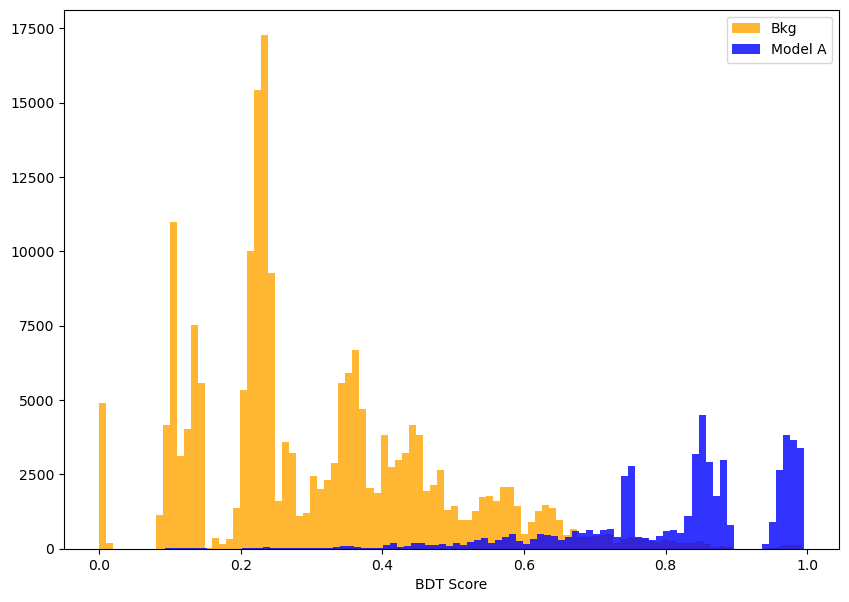

[0.8483898  0.57747227 0.65133267 ... 0.59236126 0.89377732 0.50502611]


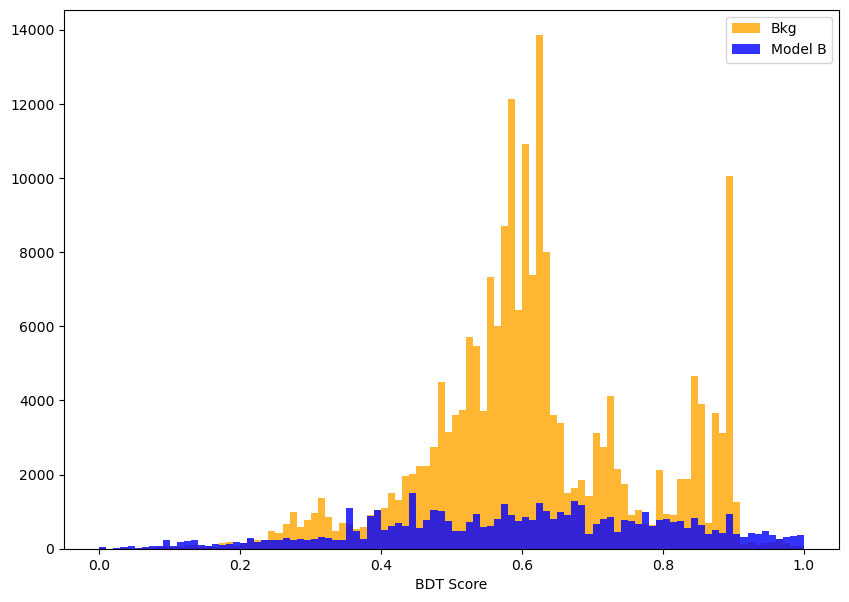

[0.26354357 0.33202567 0.32776409 ... 0.46504095 0.12047121 0.74646755]


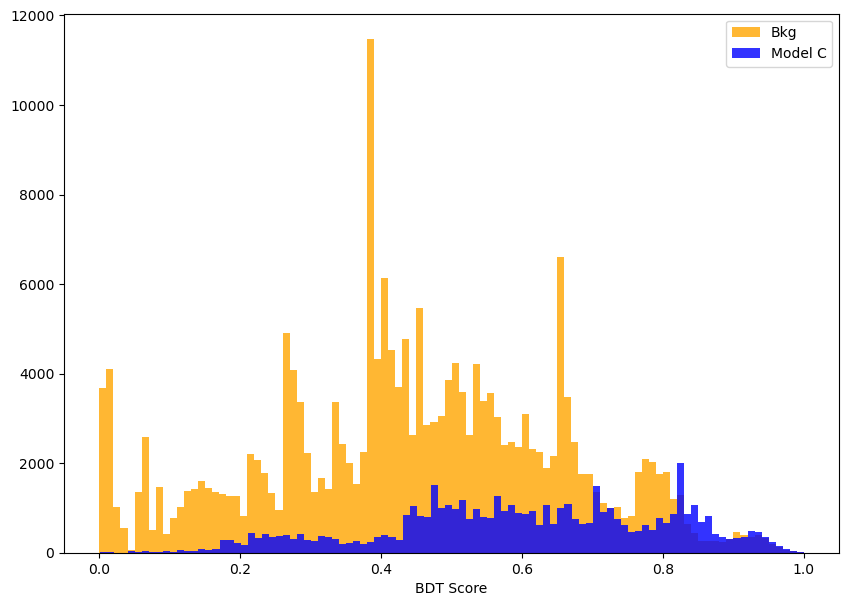

[0.22038028 0.08856161 0.66663654 ... 0.05947006 0.17986894 0.2191452 ]


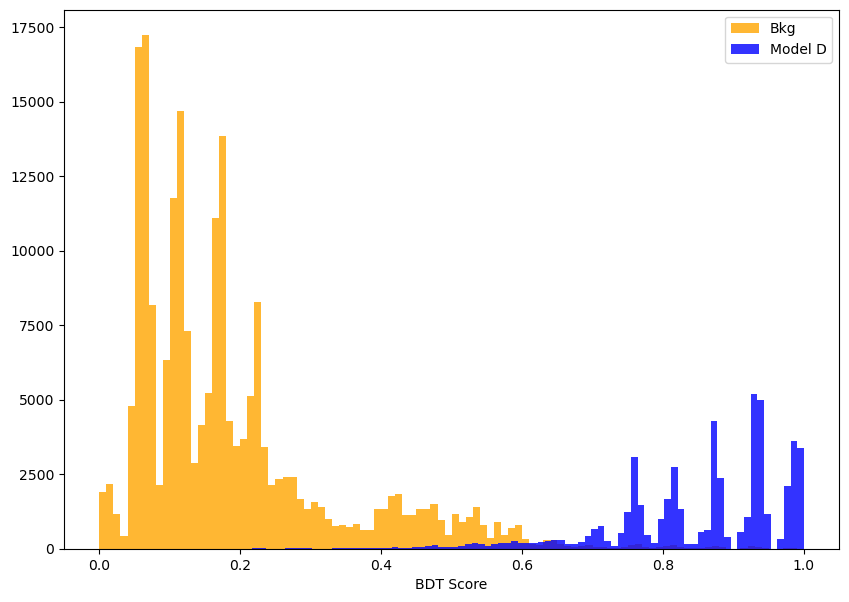

In [20]:
classes = [1, 2, 3, 4]
models = ['bkg','A', 'B', 'C', 'D']
for i in classes:
    probs = nbc.predict_proba(x_test)
    
    scaled = MinMaxScaler().fit_transform(probs)[:,i]
    plt.figure(figsize=(10,7))
    plt.hist(x=scaled[y_test==0], color='orange', label = 'Bkg', bins=100, alpha=0.8)
    plt.hist(x=scaled[y_test==i], color='blue', label = 'Model %s'%models[i], bins=100, alpha=0.8)
    plt.xlabel('BDT Score')
    plt.legend()
    plt.savefig('plots/fixed_scores/bdt_bkg_vs_model%s_scores.png'%models[i])
    plt.show()

#ONE VS REST
classes = [1, 2, 3, 4]
models = ['bkg','A', 'B', 'C', 'D']
for i in classes:
    new = classes.copy()
    new.remove(i)
    print(new)
    #y_test_new = y_test.replace(to_replace=new, value=0)
    #y_test_new = y_test_new.replace(i, 1)
    y_train_new = y_train.replace(to_replace = new, value = 0)
    y_train_new = y_train_new.replace(i, 1)
    nbc.fit(x_train, y_train_new)
    probs = nbc.predict_proba(x_test)
    preds = probs[:, 1]
    print(preds)
    scaled = MinMaxScaler().fit_transform(probs)
    plt.figure(figsize=(10,7))
    sns.histplot(x=scaled[:,0], color='orange', label = 'Model %s'%models[i])
    sns.histplot(x=scaled[:,1], color='cyan', label = 'Bkg and Others')
    plt.xlabel('BDT Score')
    plt.legend()
    plt.show()

proba_trees_multi = [nbc.estimators_[i].predict_proba(x_test) for i in range(len(nbc.estimators_))]
proba_trees_multi

proba_sum_multi = [[0,0, 0,0, 0]]
for i in range(len(proba_trees_multi)):
    proba_sum_multi+=proba_trees_multi[i]

# ROC Curves

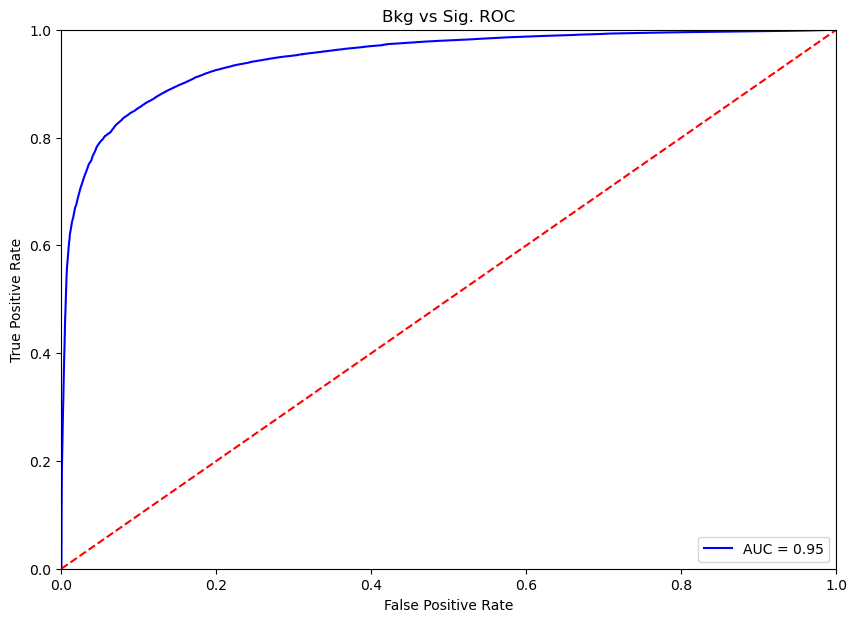

In [12]:
probs = nbc_bin.predict_proba(x_test_bin)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test_bin, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,7))
plt.title('Bkg vs Sig. ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('plots/fixed_rocs/bdt_bin_roc.png')
plt.show()

In [13]:
opt_thresh_bin = threshold[np.argmax(tpr-fpr)]
opt_thresh_bin

0.5009169846395348

#one vs rest
df_1vr = df.copy()
classes = [1, 2, 3, 4]
fpr_tpr_auc = {}
for i in classes:
    new = classes.copy()
    new.remove(i)
    print(new)
    y_test_new = y_test.replace(to_replace=new, value=0)
    y_test_new = y_test_new.replace(i, 1)
    probs = nbc.predict_proba(x_test)
    preds = probs[:, 1]
    fp, tp, thresh = roc_curve(y_test_new, preds)
    roc_auc = auc(fp, tp)
    fpr_tpr_auc[i] = {}
    fpr_tpr_auc[i]['fpr'] = fp
    fpr_tpr_auc[i]['tpr'] = tp
    fpr_tpr_auc[i]['roc_auc'] = roc_auc
    fpr_tpr_auc[i]['threshold'] = thresh

df_1vr = df.copy()
classes = [1, 2, 3, 4]
fpr_tpr_auc = {}
for i in classes:
    new = classes.copy()
    new.remove(i)
    print(new)
    y_test_new = y_test.replace(to_replace=new, value=0)
    y_test_new = y_test_new.replace(i, 1)
    y_train_new = y_train.replace(to_replace = new, value = 0)
    y_train_new = y_train_new.replace(i, 1)
    nbc.fit(x_train, y_train_new)
    probs = nbc.predict_proba(x_test)
    preds = probs[:, 1]
    fp, tp, thresh = roc_curve(y_test_new, preds)
    roc_auc = auc(fp, tp)
    fpr_tpr_auc[i] = {}
    fpr_tpr_auc[i]['fpr'] = fp
    fpr_tpr_auc[i]['tpr'] = tp
    fpr_tpr_auc[i]['roc_auc'] = roc_auc
    fpr_tpr_auc[i]['threshold'] = thresh

In [24]:
classes = [1, 2, 3, 4]
fpr_tpr_auc = {}
for i in classes:
    #x_test_new = [x_test[j] for j in range(len(y_test)) if (y_test.values[j] == i) or (y_test.values[j] == 0)]
    #y_test_new = [k for k in y_test.values if (k==i) or (k==0)]
    preds = nbc.predict_proba(x_test)[:,i]
    #preds = probs[:, i]
    fp, tp, thresh = roc_curve(y_test, preds, pos_label=i)
    roc_auc = auc(fp, tp)
    fpr_tpr_auc[i] = {}
    fpr_tpr_auc[i]['fpr'] = fp
    fpr_tpr_auc[i]['tpr'] = tp
    fpr_tpr_auc[i]['roc_auc'] = roc_auc
    fpr_tpr_auc[i]['threshold'] = thresh

Model A optimum classification threshold: 0.200
Model B optimum classification threshold: 0.203
Model C optimum classification threshold: 0.201
Model D optimum classification threshold: 0.199


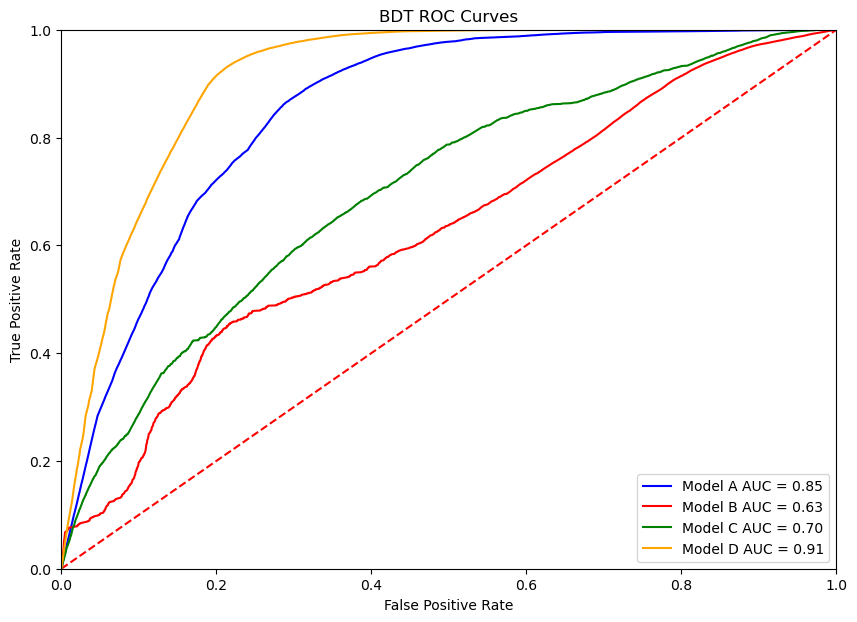

In [25]:
models = ['Bkg', 'A', 'B', 'C', 'D']
colours = ['None', 'b', 'r', 'g', 'orange']
plt.figure(figsize=(10,7))
plt.title('BDT ROC Curves')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i in fpr_tpr_auc.keys():
    plt.plot(fpr_tpr_auc[i]['fpr'], fpr_tpr_auc[i]['tpr'], 
             colours[i], label = 'Model %s AUC = %0.2f' %(models[i], fpr_tpr_auc[i]['roc_auc']))
    opt_thresh = fpr_tpr_auc[i]['threshold'][np.argmax(fpr_tpr_auc[i]['tpr']-fpr_tpr_auc[i]['fpr'])]
    print('Model %s optimum classification threshold: %0.3f'%(models[i], opt_thresh))
plt.legend(loc = 'lower right')
plt.savefig('plots/fixed_rocs/bdt_roc.png')
plt.show()